# Data-Loaders


There are three ways to upload images using AISee:

- **DatasetFromFolder**: This class is used to create a dataset from a directory where each subdirectory represents a class and contains images of that class. The class also supports custom label-to-index mapping through the <code>class_to_idx</code> parameter. When retrieving an item from the dataset, it returns the image, the label, and the image path.

- **DatasetFromDataFrame**: This class is used to create a dataset from a pandas DataFrame. The DataFrame must contain a "path" column with the full path of the images, and optionally a "label" column for single-label problems or multiple class columns for multi-label problems. The class also supports custom label-to-index mapping through the <code>class_to_idx</code> parameter. When retrieving an item from the dataset, it returns the image, the label, and the image path.

- **DatasetFromSingleImage**: This class is used to create a dataset from a single image. The image path is passed as an argument to the constructor. When retrieving an item from the dataset, it returns the image, a NaN value (np.nan) for the label, and the image path.

Let's try all these ways throughout the notebook

In [ ]:
# Import necessary libraries
import os
import zipfile

import matplotlib.pyplot as plt
import pandas as pd
import requests
from aisee import (DatasetFromDataFrame, DatasetFromFolder,
                   DatasetFromSingleImage)
from PIL import Image
from torchvision import transforms

In this section of code, we are **downloading and extracting a dataset of microorganism images** from a .zip file hosted on **Hugging Face**. 

First, the current working directory of the notebook is obtained and stored in the variable `notebook_dir`. 

Next, the URL of the .zip file is defined and stored in the `url` variable. 

The dataset is then downloaded using the `requests` library, and the content of the response is written to a file named `data.zip` in the current working directory. 

Finally, the `zipfile` library is utilized to extract the contents of the downloaded .zip file into the current working directory, after which the .zip file is closed.

In [2]:
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Define the URL to download the dataset
url = 'https://huggingface.co/IIC/aisee_resources/resolve/main/microorganisms.zip'

response = requests.get(url)

# Download the dataset from the URL and save it as "data.zip" in the current working directory
with open('data.zip', 'wb') as file:
    file.write(response.content)

# Extract the contents of the downloaded zip file into the current working directory
archivo_zip = zipfile.ZipFile(os.path.join(notebook_dir, 'data.zip'))
archivo_zip.extractall(os.path.join(notebook_dir))
archivo_zip.close()

Now we have this folder structure:

        └── Micro_Organism
            └── Amoeba
            └── Euglena
            └── Hydra
            └── Paramecium
            └── Rod_bacteria
            └── Spherical_bacteria
            └── Spiral_bacteria
            └── Yeast





### DatasetFromFolder

You can use the **DatasetFromFolder** class to load the images and labels from this directory structure as follows:

In [3]:
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the class_to_idx dictionary for the microorganism dataset
class_to_idx = {
    "Amoeba": 0,
    "Euglena": 1,
    "Hydra": 2,
    "Paramecium": 3,
    "Rod_bacteria": 4,
    "Spherical_bacteria": 5,
    "Spiral_bacteria": 6,
    "Yeast": 7
}

# Create the dataset
dataset = DatasetFromFolder("micro_organism", transform=transform, class_to_idx=class_to_idx)

The **dataset** variable now contains the images and labels from the subdirectories like Amoeba, Euglena, Hydra, etc.

The **transform** variable is an instance of torchvision.transforms.Compose. It is a sequence of image transformations that are applied to the images before they are loaded into the dataset.

The **Compose** class is a convenient way to chain multiple image transformations together. It takes a list of transformation classes as input and applies them sequentially to the input image. This is particularly useful when preprocessing images or making data-aumentation for training or testing with a neural network. To see all posible transformations look at: [https://pytorch.org/vision/stable/transforms.html](https://pytorch.org/vision/stable/transforms.html)

Let's see some images:

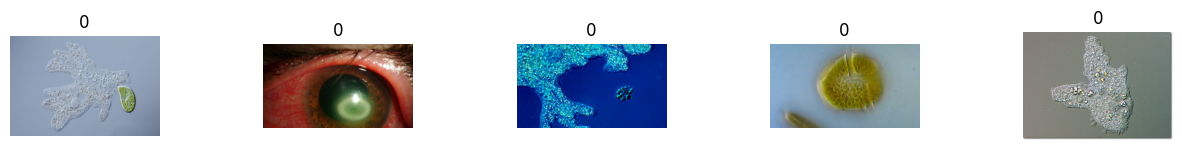

In [4]:
f,ax = plt.subplots(1,5, figsize=(15, 3))
f.subplots_adjust(wspace=0.7)
for i, (img, label, path) in enumerate(dataset):
    if i >= 5:
        break
    ax[i].imshow(Image.open(path))
    ax[i].axis('off') 
    ax[i].set_title(label)
plt.show()

### DatasetFromDataFrame


To create a dataframe from this folder structure we can use this code:


In [5]:
micro_organism_folder = "micro_organism"

# Define the list of class names
classes = [folder_name for folder_name in os.listdir(micro_organism_folder)]

# Initialize an empty list to store the data
data = []

# Iterate through each class folder and gather image paths and labels
for label in classes:
    class_folder = os.path.join(micro_organism_folder, label)
    
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        data.append([img_path, label])

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data, columns=["path", "label"])
print(df.head())

                                      path       label
0  micro_organism/Paramecium/Image_144.jpg  Paramecium
1  micro_organism/Paramecium/Image_145.jpg  Paramecium
2   micro_organism/Paramecium/Image_60.jpg  Paramecium
3   micro_organism/Paramecium/Image_95.jpg  Paramecium
4    micro_organism/Paramecium/Image_2.jpg  Paramecium


Now we can use DatasetFromDataFrame with the dataframe that we have just created:

In [6]:
# Define the image transformations
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the class_to_idx dictionary for the microorganism dataset
class_to_idx = {
    "Amoeba": 0,
    "Euglena": 1,
    "Hydra": 2,
    "Paramecium": 3,
    "Rod_bacteria": 4,
    "Spherical_bacteria": 5,
    "Spiral_bacteria": 6,
    "Yeast": 7,
}

# Create the dataset
dataset = DatasetFromDataFrame(data=df, task="single_label", transform=transformations, class_to_idx=class_to_idx)

The **dataset** variable now contains the images and labels from the subdirectories like Amoeba, Euglena, Hydra, etc.

The **transform** variable is an instance of torchvision.transforms.Compose. It is a sequence of image transformations that are applied to the images before they are loaded into the dataset.

The **Compose** class is a convenient way to chain multiple image transformations together. It takes a list of transformation classes as input and applies them sequentially to the input image. This is particularly useful when preprocessing images or making data-aumentation for training or testing with a neural network. To see all posible transformations look at: [https://pytorch.org/vision/stable/transforms.html](https://pytorch.org/vision/stable/transforms.html)

Let's see some images

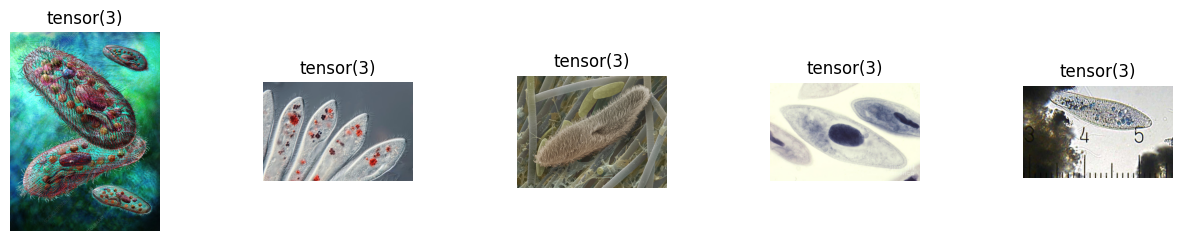

In [7]:
f,ax = plt.subplots(1,5, figsize=(15, 3))
f.subplots_adjust(wspace=0.7)
for i, (img, label, path) in enumerate(dataset):
    if i >= 5:
        break
    ax[i].imshow(Image.open(path))
    ax[i].axis('off') 
    ax[i].set_title(label)
plt.show()

### DatasetFromSingleImage

This class is useful if we only want to load an image for example to make inference.

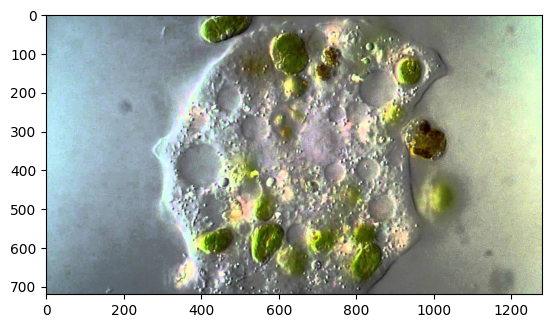

In [8]:
#Path to single image
image_path = "micro_organism/Amoeba/Image_22.jpg"

# Define the image transformations
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the dataset
single_image_dataset = DatasetFromSingleImage(data=image_path, transform=transformations)

image, label, path = single_image_dataset[0]

#Show image
plt.imshow(Image.open(path))

Now you have a dataset object **single_image_dataset** that loads the specified image, applies the transformations, and allows you to access the transformed image, the (non-existent) label, and the image path. This dataset object can be used with a pre-trained model to obtain predictions for the single image.